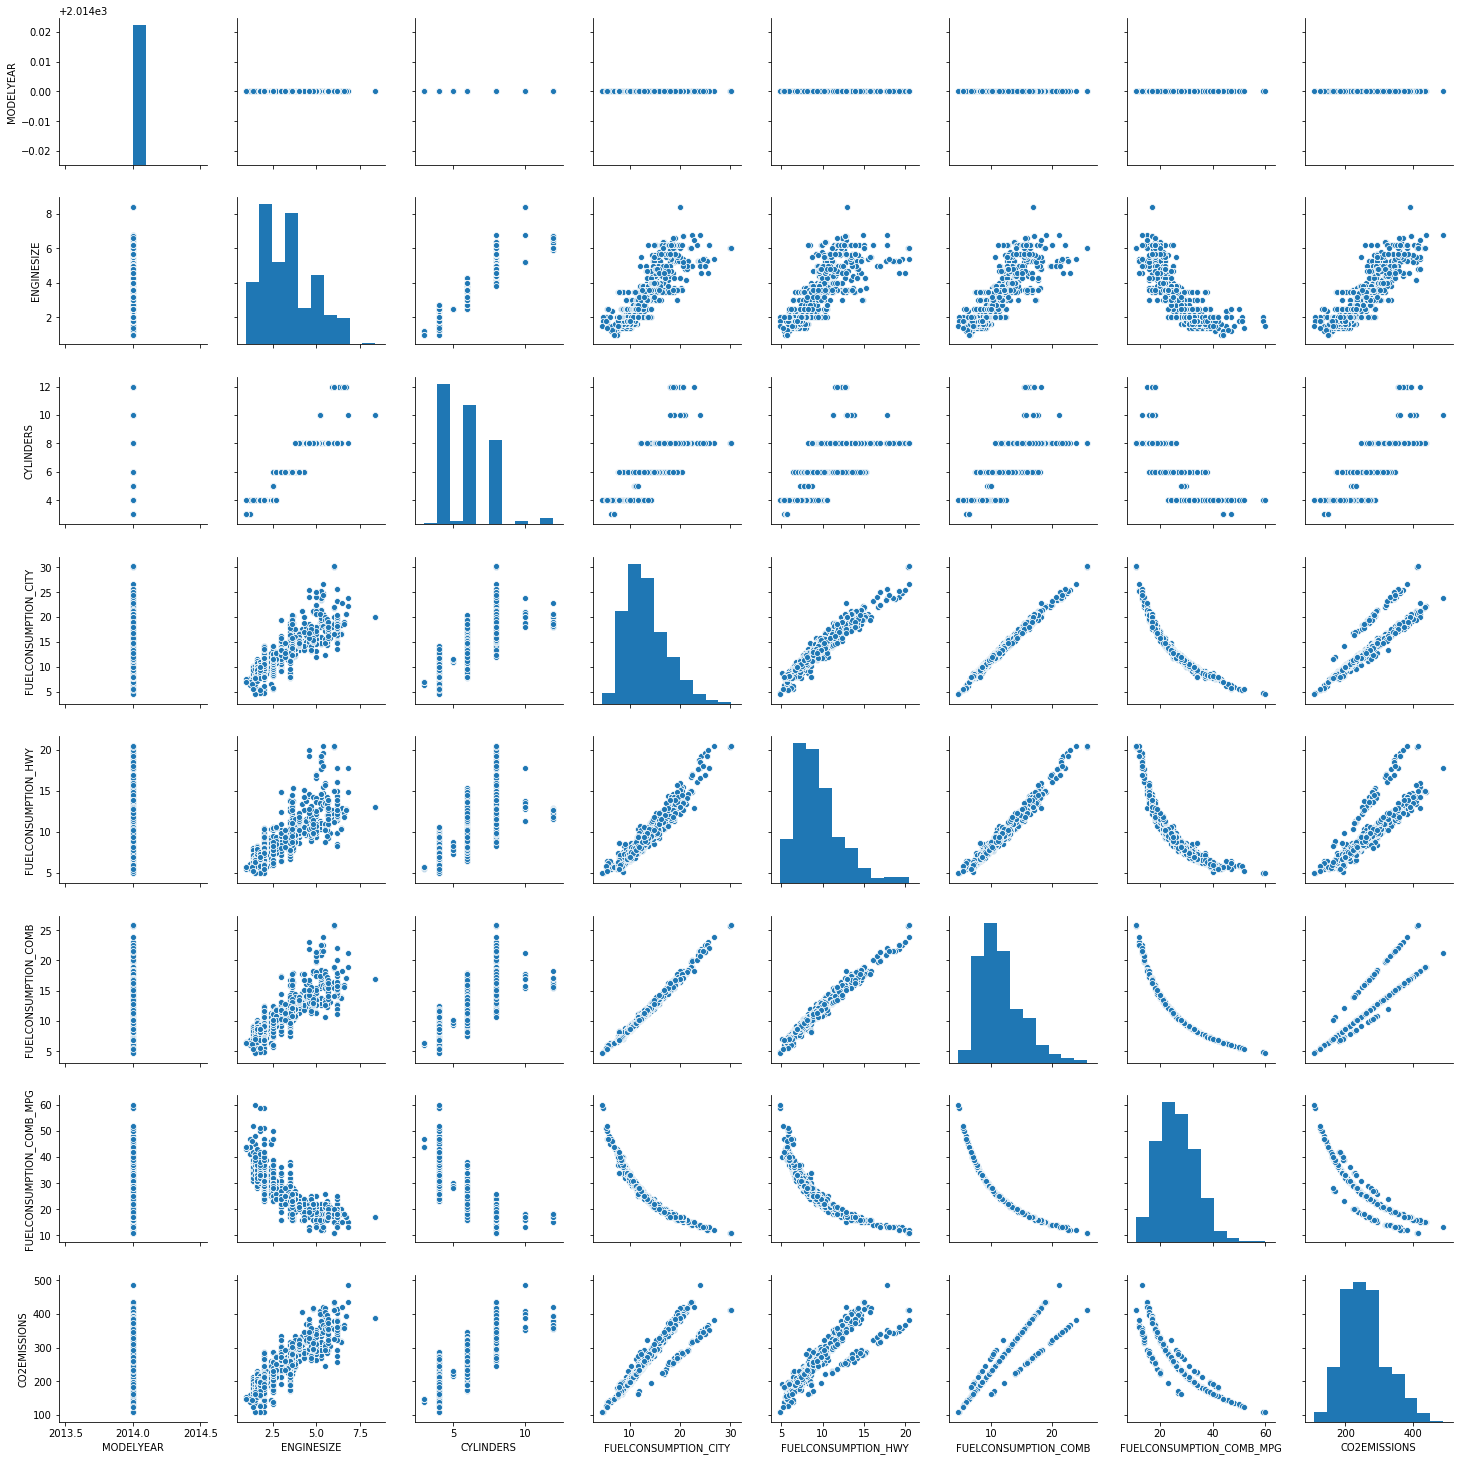

In [2]:
# READING THE DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
data=pd.read_csv('FuelConsumption.csv')
sb.pairplot(data)

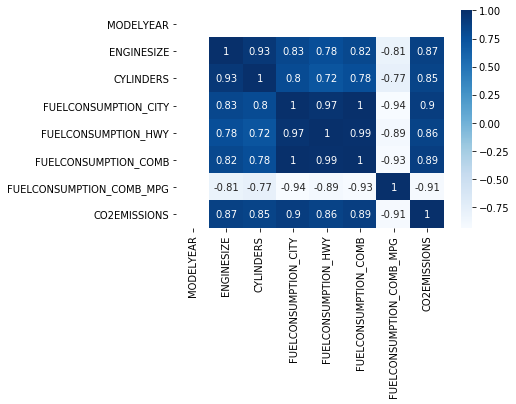

In [3]:
# DATA ANALYSIS
sb.heatmap(data.corr(),cmap='Blues',annot=True)

In [4]:
# CONVERTING DATAFRAME TO ARRAYDATA
x=np.asanyarray(data[['FUELCONSUMPTION_COMB_MPG']])
y=np.asanyarray(data['FUELCONSUMPTION_COMB'])
print(x.shape)

(1067, 1)


In [5]:
# SPLIT , PREPROCESS AND TRAIN THE MODEL
# CHECK THE BEST VALUSE OF ALPHA{ REGURLARISATION PARAMETER} Vs ACCYRACY OF THE MODEL
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# PREPROCESSING
scaler=MinMaxScaler()
x=scaler.fit_transform(x)


# ADDING HIGHER DEGREE FEATURES TO HYPOTHESIS
poly=PolynomialFeatures(degree=2)
x=poly.fit_transform(x)


# SPLIT THE DATA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lst=[]

# CHECK THE BEST VALUE OF ALPHA
for i in range(0,21):
    LLR=Ridge(alpha=i).fit(x_train,y_train)
    #predict=RR.predict(x_test)
    #print(RR.score(x_test,y_test),predict,sep='\n')
    lst.append(LLR.score(x_test,y_test))
    
    
p=range(0,21)
dit=dict(zip(lst,p))
key=max(list(dit.keys()))
val_alpha=dit[key]
print(val_alpha,key,dit,sep='\n')


0
0.9733506808056591
{0.9733506808056591: 0, 0.9023662090188811: 1, 0.8620816654208542: 2, 0.8377547728780458: 3, 0.820150510147139: 4, 0.8058254133168239: 5, 0.7932818596812099: 6, 0.7817900833681275: 7, 0.7709657200462605: 8, 0.7605952410481348: 9, 0.7505556415114377: 10, 0.7407743580499717: 11, 0.7312079741211404: 12, 0.7218303453144932: 13, 0.712625723813711: 14, 0.7035846606023398: 15, 0.6947015097934055: 16, 0.6859728855012043: 17, 0.677396699118794: 18, 0.668971557224805: 19, 0.6606963869577014: 20}


Text(0.5, 1.0, 'BEST VALUE OF ALPHA')

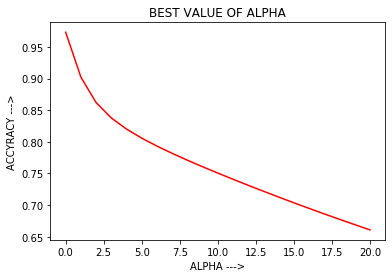

In [6]:
# ACCURACY  Vs ALPHA GRAPH
plt.plot(p,lst,color='red')
plt.xlabel('ALPHA --->')
plt.ylabel('ACCYRACY --->')
plt.title('BEST VALUE OF ALPHA')

In [7]:
# TRAIN WITH BEST VALUE OF ALPHA
LLR=Ridge(alpha=1).fit(x_train,y_train)
predict=LLR.predict(x_test)
print('training_accuracy :',LLR.score(x_train,y_train))
print('test_accuracy :',LLR.score(x_test,y_test),predict,sep='\n')


print(LLR.intercept_,LLR.coef_)

training_accuracy : 0.9066945252461754
test_accuracy :
0.9023662090188811
[12.4310861   9.1597582   8.7810232   6.317671   14.2277153   8.40899509
  6.317671    8.40899509 10.33620452  7.68505951 10.74176706 12.87018307
  8.40899509 16.13165468  8.04367386  6.6494578   8.7810232  14.69363982
 12.4310861  10.33620452 18.66248383 10.33620452 11.57301281 11.99869601
 13.76849767 10.74176706  5.05759265 11.57301281  7.68505951 12.4310861
  9.54520009 16.13165468 10.74176706 16.62440673 12.87018307 14.2277153
 15.6456095   6.6494578  16.13165468 12.4310861  10.74176706 15.16627122
 10.74176706 11.99869601 11.57301281  9.1597582   8.40899509  2.85936648
  5.67421805 11.57301281  8.04367386 15.16627122 16.13165468 15.16627122
 10.33620452 12.87018307  9.1597582  11.99869601 12.4310861   7.33315206
  9.54520009 12.4310861  10.33620452  8.04367386 10.74176706  8.40899509
 11.99869601 11.57301281  9.54520009 10.74176706 10.33620452 10.33620452
 15.16627122 10.74176706 16.13165468 13.31598693  4.

In [8]:
print(x_test.shape,predict.shape)

(214, 3) (214,)


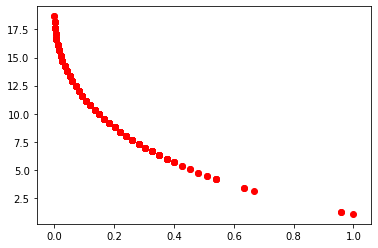

In [9]:
plt.scatter(x_train[:,2],LLR.predict(x_train),color='red')